In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
  
data = pd.read_csv("../dataset/LoanApprovalPrediction.csv") 

In [4]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [8]:
data.drop('Loan_ID', axis=1, inplace=True)

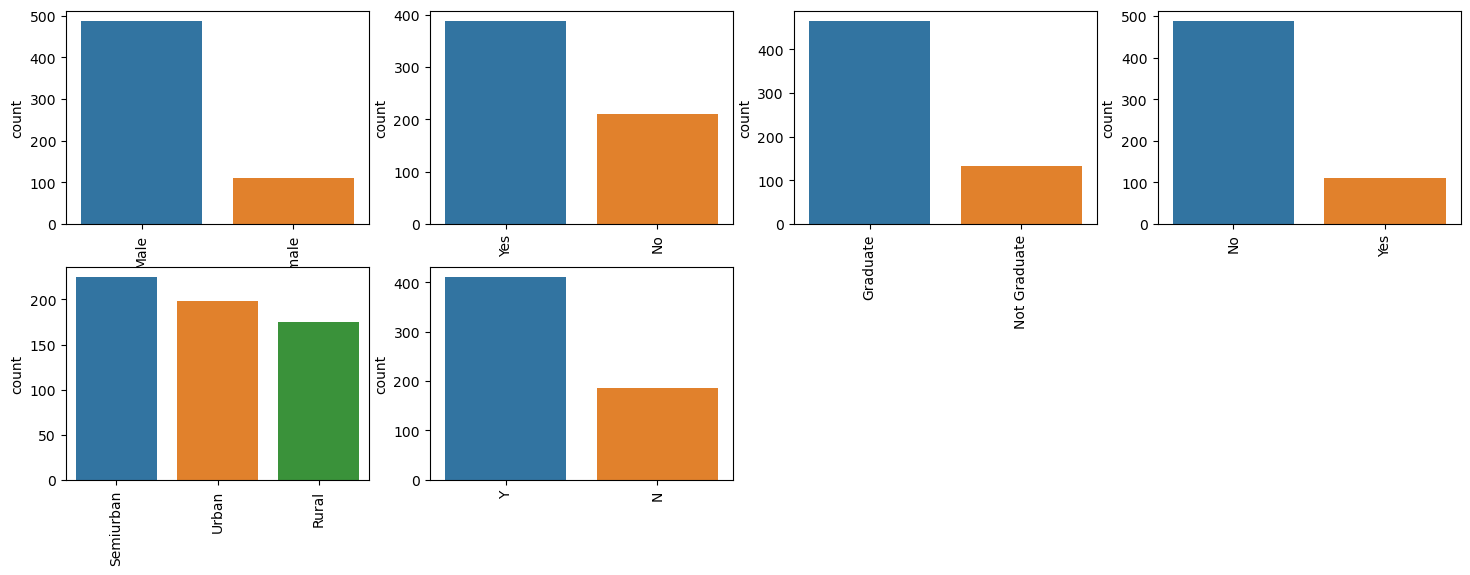

In [21]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
    data[col] = label_encoder.fit_transform(data[col])

In [33]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
594,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
595,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
596,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [40]:

for col in data.columns: 
  data[col] = data[col].fillna(data[col].mean())  
    
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

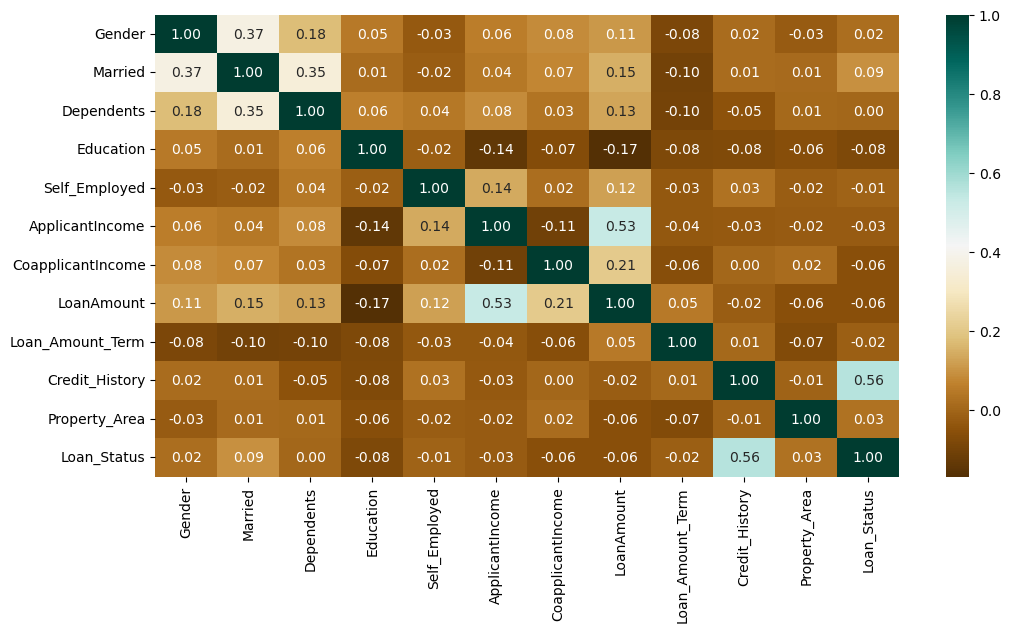

In [37]:

plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f', 
            annot=True)

In [41]:
from sklearn.model_selection import train_test_split 

X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
X.shape,Y.shape 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
													test_size=0.4, 
													random_state=1) 
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((358, 11), (240, 11), (358,), (240,))

In [64]:
X_train


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
168,1,1,3.0,1,0,3522,0.0,81.0,180.000000,1.0,0
370,1,0,0.0,0,0,3069,0.0,71.0,480.000000,1.0,2
519,1,0,2.0,0,0,3588,0.0,110.0,360.000000,0.0,0
121,1,1,2.0,0,0,2957,0.0,81.0,360.000000,1.0,1
274,1,0,1.0,1,1,4053,2426.0,158.0,360.000000,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
129,1,0,0.0,0,0,2718,0.0,70.0,360.000000,1.0,1
144,1,1,1.0,0,0,1538,1425.0,30.0,360.000000,1.0,2
72,1,1,3.0,1,0,4755,0.0,95.0,341.917808,0.0,1
235,1,1,1.0,1,0,2510,1983.0,140.0,180.000000,1.0,2


In [50]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 

from sklearn import metrics 

knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(n_estimators = 7, 
							criterion = 'entropy', 
							random_state =7) 
svc = SVC() 
lc = LogisticRegression() 

# making predictions on the training set 
for clf in (rfc, knn, svc,lc): 
	clf.fit(X_train, Y_train) 
	Y_pred = clf.predict(X_train) 
	print("Accuracy score of ", 
		clf.__class__.__name__, 
		"=",100*metrics.accuracy_score(Y_train, 
										Y_pred))


Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.44692737430168


c:\Users\vinay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
rfc.predict([z])

c:\Users\vinay\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [75]:

z = pd.DataFrame({
    "Gender": [0.0],
    "Married": [0.0],
    "Dependents": [0.0],
    "Education": [0.0],
    "Self_Employed": [0.0],
    "ApplicantIncome": [0.0],
    "CoapplicantIncome": [0.0],
    "LoanAmount": [144.968804],
    "Loan_Amount_Term": [360.0],
    "Credit_History": [1.0],
    "Property_Area": [2.0]
})


In [76]:
pred =rfc.predict(z)
pred

array([0])

array([1])